# Oily Giant: Predicción Estratégica de Ubicaciones para Pozos Petroleros con Machine Learning

### 0.1. Introducción

En este proyecto, desarrollaré un modelo de machine learning para una compañía de petróleo que busca identificar la mejor ubicación para abrir 200 nuevos pozos. El objetivo es analizar los beneficios y riesgos potenciales basados en datos geológicos y muestras de crudo provenientes de tres regiones distintas. El modelo tendrá la tarea de seleccionar la región con el mayor margen de beneficio, ayudando a la empresa a tomar decisiones informadas y estratégicas sobre su expansión. Utilizando técnicas avanzadas de análisis y predicción, se optimizará la distribución de los recursos para maximizar la rentabilidad y minimizar los riesgos operativos.

#### Tabla de contenido:

1. Preparación de datos
- 1.2. Preparación de dataset 0

##### 2. Funciones:
- 2.1. Función para segmentación del conjunto de datos
- 2.2. Función para entrenar un modelo de regresión lineal 
- 2.3. Función para el cálculo de ganancias
- 2.4. Función para cálcular de ganancias en submuestras del dataset
- 2.5. Función para calcular el intervalo de confianza y riesgo de pérdidas

##### 3. Entrenamiento de un modelo de regresión lineal:
- 3.1. Entrenar el modelo en "dataset 0"
- 3.2. Entrenar el modelo en "dataset 1"
- 3.3. Entrenar el modelo en "dataset 0"
##### 4. Comparar los promedios de reserva mínima para las tres regiones 
##### 5. Calcular las ganacias potenciales en cada región para los 200 principales pozos de crudo
##### 6. Realizar bootstrapping y calcular ganancias promedio, riesgos de pérdida e intervalo de confianza de 95%:
- 6.1. Beneficios promedio y riesgo de pérdida en dataset "0"
- 6.2. Beneficios promedio y riesgo de pérdida en dataset "1"
- 6.3. Beneficios promedio y riesgo de pérdida en dataset "2"
##### 7 Gráficos de ganancias promedio en las submuestras de las tres regiones:
- 7.1. Gráfico de ganancias promedio en submuestras de región "0"
- 7.2. Gráfico de ganancias promedio en submuestras de región "1"
- 7.3. Gráfico de ganancias promedio en submuestras de región "2"
##### 8. Conclusiones generales

## 1. Preparación de datos

In [37]:
#importar librerías
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression


In [2]:
#cargar datasets
dataset_0 = pd.read_csv('files /data/geo_data_0.csv')
dataset_1 = pd.read_csv('files /data/geo_data_1.csv')
dataset_2 = pd.read_csv('files /data/geo_data_2.csv')

### 1.2. Preparación de dataset 0 

In [3]:
#visualizar datos
dataset_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#visualizar tipo de datos
dataset_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#verificar datos ausentes
dataset_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
#verificar datos duplicados en todo el dataset
print(dataset_0.duplicated().sum())

#verificar datos duplicados en los id
print(dataset_0['id'].duplicated().sum())

0
10


En el dataset 0 se visualizan tipos de datos correctos en cada columna y no hay datos ausentes. En cuanto a duplicados, en el dataset completo no encontré ninguno, sin embargo, al revisar la columna de IDs únicos, encontré 10 datos duplicados, los cuales voy a eliminar.

In [7]:
#eliminar datos duplicados de la columna ID
dataset_0 = dataset_0.drop_duplicates(subset='id')

#verificar nuevamente datos duplicados 
dataset_0['id'].duplicated().sum()


0

array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

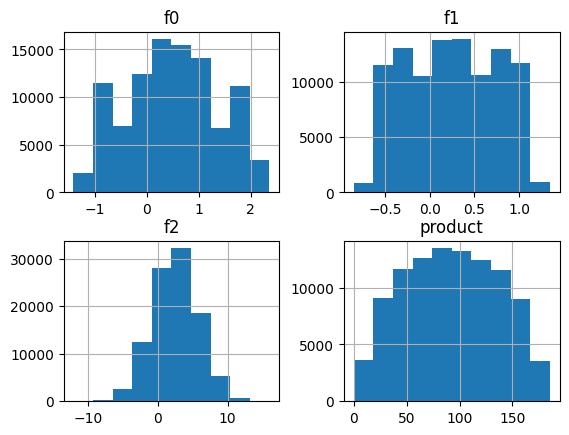

In [8]:
#visualizar la frecuencia del dataset 0 con un histograma
dataset_0.hist()

El dataset "0" ya está preparado para trabajar con el. En cuánto a la visualización de los histogramas, en este dataest se aprecia una distribución de datos normal. 

### 1.2.2. Preparar "Dataset 1"

In [9]:
#visualizar datos
dataset_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
#verificar informacion general del dataset
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
#verificar datos ausentes
dataset_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
#verificar datos duplicados en todo el dataset
print(dataset_1.duplicated().sum())

#verificar datos duplicados en los IDs
print(dataset_1['id'].duplicated().sum())

0
4


En el dataset 1 se visualizan tipos de datos correctos en cada columna y no hay datos ausentes. En cuanto a duplicados, en el dataset completo no encontré ninguno, sin embargo, al revisar la columna de IDs únicos, encontré 4 datos duplicados, los cuales voy a eliminar.

In [13]:
#eliminar datos duplicados de la columna ID
dataset_1 = dataset_1.drop_duplicates(subset='id')

#verificar nuevamente datos duplicados 
dataset_1['id'].duplicated().sum()


0

array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

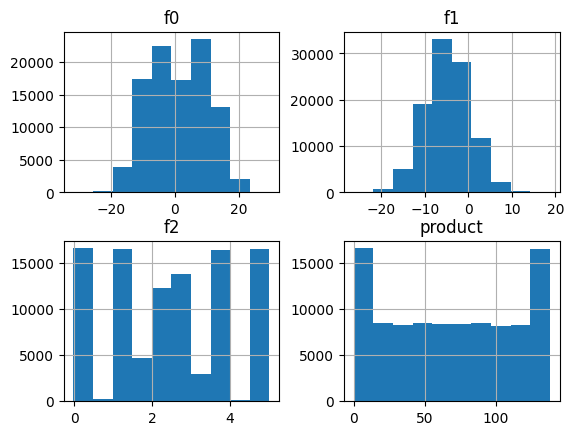

In [14]:
#visualizar la frecuencia del dataset 1 con un histograma
dataset_1.hist()

En este dataset, se aprecian datos con una distribucion anormal en dos columnas: 'f2' y 'product'. Por otro lado, ya están preparados los datos para trabajar con ellos

### 1.2.3. Preparar "Dataset 2"

In [15]:
#visualizar datos
dataset_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [16]:
#visualizar informacion general del dataset
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
#verificar datos ausentes
dataset_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
#verificar datos duplicados en el dataset completo
print(dataset_2.duplicated().sum())

#verificar datos duplicados en los IDs
print(dataset_2['id'].duplicated().sum())

0
4


En el dataset 2 se visualizan tipos de datos correctos en cada columna y no hay datos ausentes. En cuanto a duplicados, en el dataset completo no encontré ninguno, sin embargo, al revisar la columna de IDs únicos, encontré 4 datos duplicados, los cuales voy a eliminar.

In [19]:
#eliminar datos duplicados de la columna ID
dataset_2 = dataset_2.drop_duplicates(subset='id')

#verificar nuevamente datos duplicados 
dataset_2['id'].duplicated().sum()


0

array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

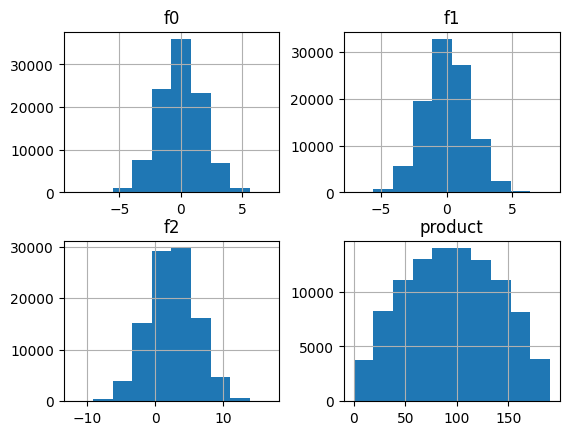

In [20]:
#visualizar la frecuencia del dataset 2 con un histograma
dataset_2.hist()

Ya se encuentran los tres datasets preparados para comenzar a trabajar con ellos. En cuanto a la distribución de los datos, parece normal en todas las columnas.

## 2. Funciones

### 2.1. Función para segmentación del conjunto de datos

In [21]:
#funcion para segmentacion de datos
def data_seg(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

### 2.2. Función para entrenar un modelo de regresión lineal 

In [22]:
#funcion para modelo de regresion lineal
def linear_regresion_model(features_train, features_valid, target_train, target_valid):

    #entrenar un modelo de regresion lineal 
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    #realizar predicciones con el conjunto de validacion
    predictions = model.predict(features_valid)
    predictions_valid = pd.Series(predictions)
    
    #crear un dataframe con target_valid y prediction_valid
    data_target_predictions = pd.DataFrame({'prediction_valid': predictions_valid, 'target_valid': target_valid})
    data_target_predictions = data_target_predictions.dropna()
    
    #separar el dataframe concatenado en dos variable
    predictions_to_revenue = data_target_predictions['prediction_valid'].sort_values(ascending=False)
    target_to_revenue = (data_target_predictions['target_valid'])[predictions_to_revenue.index]
    
    #calcular el promedio  de las predicciones del modelo
    predictions_mean = predictions_valid.mean()
    
    #calcular promedio de volumen verdadero de reservas
    target_valid_mean = target_valid.mean()
    
    #calcular RMSE del modelo
    mse_model = mean_squared_error(target_valid, predictions_valid)
    rmse_model = mse_model ** 0.05
    
    #crear variables con las metricas del modelo
    model_metrics = print('Volúmen medio verdadero de reservas en la región:', target_valid_mean),
    print('Volúmen medio de reservas predicho por el modelo:', predictions_mean),
    print('RMSE del modelo:', rmse_model)
        
    return model_metrics, predictions_to_revenue, target_to_revenue

### 2.3. Función para el cálculo de ganancias

In [23]:
#funcion para calcular las ganancias potenciales de los 200 principales pozos por region
def wells_revenue(predictions):
    
    
    #calcular la ganancia potencial en las predicciones
    wells_volum_sum = predictions.sum()
    revenue = wells_volum_sum * 4500 - 100000000
    
    return revenue

### 2.4. Función para cálcular de ganancias en submuestras del dataset 

In [24]:
#funcion para crear submuestras con bootstrapping
def bootstrap_revenue(predictions):
    
    state = np.random.RandomState(12345)
    values = []
    
    
    for i in range(1000):
        subsamples = predictions.sample(n=500, random_state=state, replace=True)
        values.append(wells_revenue(subsamples))
    
    values = pd.Series(values)
    
    return values

### 2.5. Función para calcular el intervalo de confianza y riesgo de pérdidas

In [25]:
#calcular el benenifio promedio en el bootstrap
def confindece_risk_interval(predictions):

    #hacer bootstrap de las predicciones
    revenue_subsamples = bootstrap_revenue(predictions)

    #calcular el beneficio promedio de las muestras
    revenue_subsamples_mean = revenue_subsamples.mean()
    
    #calcular el intervalo de confianza del 95% de las ganancias 
    lower_quantile = revenue_subsamples.quantile(0.025)
    upper_quantile = revenue_subsamples.quantile(0.975)

    #calcular el riesgo de pérdidas
    risk_percent = (predictions < 0).sum() / 100

    return revenue_subsamples, revenue_subsamples_mean, lower_quantile, upper_quantile, risk_percent

## 3. Entrenamiento de un modelo de regresión lineal

### 3.1. Entrenar el modelo en "dataset 0"

In [26]:
#definir variables para entrenar el modelo en el dataset 0
features_0 = dataset_0.drop(['id', 'product'], axis=1)
target_0 = dataset_0['product']

#segmentar el dataset 0 en conjuntos de entrenamiento y valiacion 75:25
features_train_0, features_valid_0, target_train_0, target_valid_0 = data_seg(features_0, target_0)

#entrenar modelo en dataset 0
model_metrics_0, predictions_to_revenue_0, target_to_revenue_0 = linear_regresion_model(features_train_0, features_valid_0, target_train_0, target_valid_0)

print('Region "0"', model_metrics_0) 

Volúmen medio verdadero de reservas en la región: 92.15820490940044
Volúmen medio de reservas predicho por el modelo: 92.78915638280621
RMSE del modelo: 1.4381713586741687
Region "0" (None,)


Luego de calcular el RMSE para las prediciones del modelo en el dataset 0 y obtener un valor de 1.43, me doy cuenta de que el modelo parece bastante acertado. De modo que el modelo es adecuado para la ejecución de la tarea.

### 3.2. Entrenar el modelo en "datset 1"

In [27]:
#definir variable en dataset 1
features_1 = dataset_1.drop(['id', 'product'], axis=1)
target_1 = dataset_1['product']

#segmentar datos para el dataset 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = data_seg(features_1, target_1)

#entrenar modelo en dataset 1
model_metrics_1, predictions_to_revenue_1, target_to_revenue_1 = linear_regresion_model(features_train_1, features_valid_1, target_train_1, target_valid_1)

print('Region "1"', model_metrics_1) 

Volúmen medio verdadero de reservas en la región: 69.18604400957675
Volúmen medio de reservas predicho por el modelo: 69.17831957030432
RMSE del modelo: 0.988642715640864
Region "1" (None,)


En el dataset 1 el modelo es más preciso que con el dataset anterior, con un RMSE de 0.98 en las predicciones.

### 3.3. Entrenar el modelo en "dataset 2"

In [28]:
#entrenando el modelo en dataset 2
features_2 = dataset_2.drop(['id', 'product'], axis=1)
target_2 = dataset_2['product']

#segmentar datos para el dataset 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = data_seg(features_2, target_2)

#entrenar modelo en dataset 1
model_metrics_2, predictions_to_revenue_2, target_to_revenue_2 = linear_regresion_model(features_train_2, features_valid_2, target_train_2, target_valid_2)

print('Region "2"', model_metrics_2)

Volúmen medio verdadero de reservas en la región: 94.7851093536914
Volúmen medio de reservas predicho por el modelo: 94.86572480562035
RMSE del modelo: 1.4463995400767802
Region "2" (None,)


Finalmente, en el dataset 2, el modelo da un RMSE de 1.44 en las predicciones. 
En los tres casos, el modelo erró entre 0.98 y 1.44. Sin embargo, me parece que el modelo es aceptable en los tres datasets ya que la diferencia no es un número demasiado alto, sobretodo cuando lo comparamos con los volúmenes de reserva máximos con los que estamos trabajando.

## 4. Comparar los promedios de reserva mínima para las tres regiones 

In [29]:
#almacenar los valores con las condiciones de inversión
inversion = 100000000
wells_units = 200
units_per_well_min = inversion / wells_units / 4500

print('Cantidad mínima de unidades de reservas para evitar pérdidas:', units_per_well_min)


Cantidad mínima de unidades de reservas para evitar pérdidas: 111.11111111111111


In [30]:
#calcular la cantidad media de reservas en cada region
print('Media de unidades de reserva en la región "0":', dataset_0['product'].mean())
print('Media de unidades de reserva en la región "1":', dataset_1['product'].mean())
print('Media de unidades de reserva en la región "2":', dataset_2['product'].mean())

Media de unidades de reserva en la región "0": 92.49968421774354
Media de unidades de reserva en la región "1": 68.82391591804064
Media de unidades de reserva en la región "2": 94.99834211933378


En promedio, ninguna de las zonas llega al promedio mínimo de reservas de 111.1  que se necesitan para evitar pérdidas en la inversión de 100 millones de dólares.

## 5. Calcular las ganacias potenciales en cada región para los 200 principales pozos de crudo

In [31]:
#seleccionar los 200 principales pozos por region
top_200_predictions_0 = predictions_to_revenue_0.head(200)
top_200_predictions_1 = predictions_to_revenue_1.head(200)
top_200_predictions_2 = predictions_to_revenue_2.head(200)

#calcular las potenciales ganancias
revenues_0 = wells_revenue(top_200_predictions_0)
revenues_1 = wells_revenue(top_200_predictions_1)
revenues_2 = wells_revenue(top_200_predictions_2)

print('Ganancias potenciales para los 200 principales pozos en la region "0":', revenues_0)
print('Ganancias potenciales para los 200 principales pozos en la region "1":', revenues_1)
print('Ganancias potenciales para los 200 principales pozos en la region "2":', revenues_2)


Ganancias potenciales para los 200 principales pozos en la region "0": 30429876.617481366
Ganancias potenciales para los 200 principales pozos en la region "1": 24291231.090974465
Ganancias potenciales para los 200 principales pozos en la region "2": 25728735.744968355


Luego de calcular las ganancias en las tres regiones obtuve que la mayor cifra la arroja la región "0",  con una ganacia potencial de aproximadamente 30 millones de dólares según las prediccines del modelo entrenado.

## 6. Realizar bootstrapping y calcular ganancias promedio, riesgos de pérdida e intervalo de confianza de 95%

### 6.1. Beneficios promedio y riesgo de pérdida en dataset "0"

In [32]:
#calcular beneficio promedio, riesgos e intervalo de confianza en region 0
revenue_subsamples_0, revenue_subsamples_mean_0, lower_quantile_0, upper_quantile_0, risk_percent_0 = confindece_risk_interval(predictions_to_revenue_0)

print("Beneficio promedio de ganancias en submuestra de region '0':", revenue_subsamples_mean_0)
print(f"El intervalo de confianza para las ganancias en la region '0' es entre {lower_quantile_0} y {upper_quantile_0} millones")
print(f"Riesgo de pérdidas en región '0': {risk_percent_0} %")

Beneficio promedio de ganancias en submuestra de region '0': 108378931.45879172
El intervalo de confianza para las ganancias en la region '0' es entre 103667392.15239125 y 113262422.44196674 millones
Riesgo de pérdidas en región '0': 0.0 %


### 6.2. Beneficios promedio y riesgo de pérdida en dataset "1"

In [33]:
#calcular beneficio promedio, riesgos e intervalo de confianza en region 1

revenue_subsamples_1, revenue_subsamples_mean_1, lower_quantile_1, upper_quantile_1, risk_percent_1 = confindece_risk_interval(predictions_to_revenue_1)

print("Beneficio promedio de ganancias en submuestra de region '1':", revenue_subsamples_mean_1)
print(f"El intervalo de confianza para las ganancias en la region '1' es entre {lower_quantile_1} y {upper_quantile_1} millones")
print(f"Riesgo de pérdidas en región '1': {risk_percent_1} %")

Beneficio promedio de ganancias en submuestra de region '1': 55522279.76908669
El intervalo de confianza para las ganancias en la region '1' es entre 46675286.379325345 y 64051241.91975471 millones
Riesgo de pérdidas en región '1': 1.19 %


### 6.3. Beneficios promedio y riesgo de pérdida en dataset "2"

In [34]:
#calcular beneficio promedio, riesgos e intervalo de confianza en region 2

revenue_subsamples_2, revenue_subsamples_mean_2, lower_quantile_2, upper_quantile_2, risk_percent_2 = confindece_risk_interval(predictions_to_revenue_2)

print("Beneficio promedio de ganancias en submuestra de region '2':", revenue_subsamples_mean_2)
print(f"El intervalo de confianza para las ganancias en la region '2' es entre {lower_quantile_2} y {upper_quantile_2} millones")
print(f"Riesgo de pérdidas en región '2': {risk_percent_2} %")

Beneficio promedio de ganancias en submuestra de region '2': 114226838.48281623
El intervalo de confianza para las ganancias en la region '2' es entre 110418952.10991834 y 118080680.3394517 millones
Riesgo de pérdidas en región '2': 0.0 %


## 7 Gráficos de ganancias promedio en las submuestras de las tres regiones

### 7.1. Gráfico de ganancias promedio en submuestras de región "0"


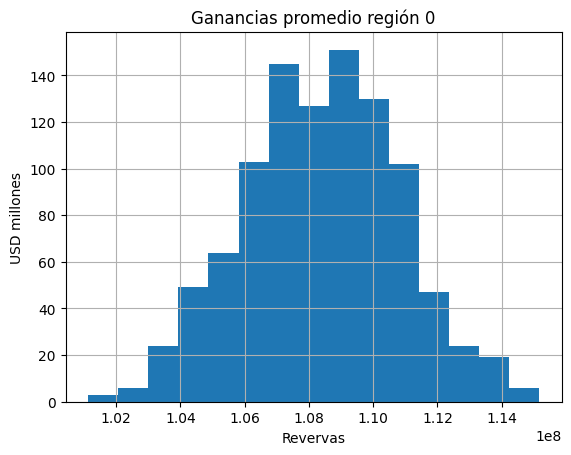

In [43]:
#crear un histograma de las ganancias promedio en las submuestras de la región "0"
revenue_subsamples_0.hist(bins=15)
plt.title('Ganancias promedio región 0')
plt.ylabel('USD millones')
plt.xlabel('Revervas')
plt.show()

### 7.2. Gráfico de ganancias promedio en submuestras de región "1"



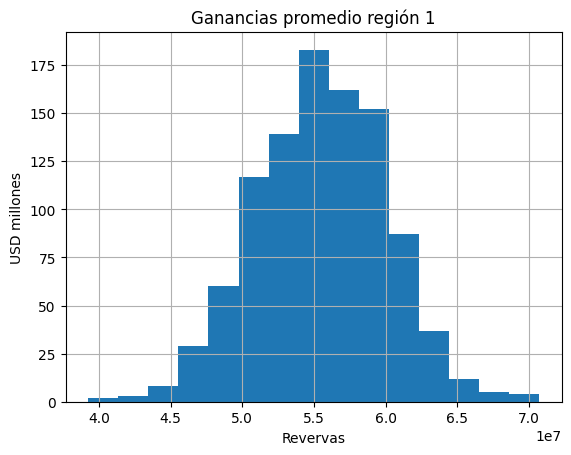

In [42]:
#crear un histograma de las ganancias promedio en las submuestras de la región "1"
revenue_subsamples_1.hist(bins=15)
plt.title('Ganancias promedio región 1')
plt.ylabel('USD millones')
plt.xlabel('Revervas')
plt.show()

### 7.3. Gráfico de ganancias promedio en submuestras de región "2"


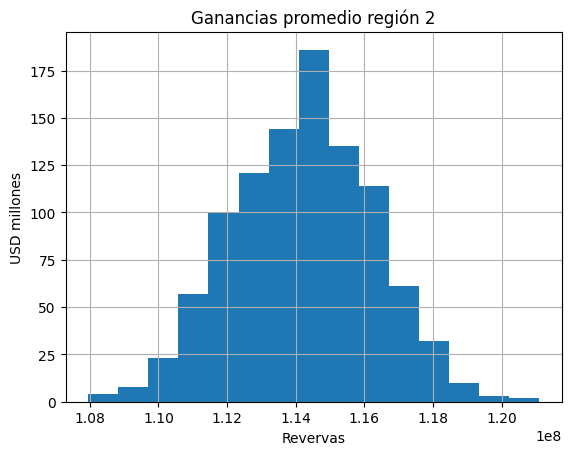

In [44]:
#crear un histograma de las ganancias promedio en las submuestras de la región "2"
revenue_subsamples_2.hist(bins=15)
plt.title('Ganancias promedio región 2')
plt.ylabel('USD millones')
plt.xlabel('Revervas')
plt.show()

Todas las distribuciones de ganacias promedio en las submuestras son normales.

## 8. Coclusiones generales

Para desarrollar este proyecto, lo principal fue preparar los datos correspondientes a 3 regiones con reservas de crudo, para posterioermente realizar cálculos con ellos.

 Mediante un análisis exploratorio, limpié cada dataset para eliminar algunos duplicados y asegurarme de que no hubieran datos ausentes. También construí algunos histogramas para analizar la distribución de los datos, pudiendo observar que los datasets "0" y "2" tienen una distribución normal, mientras que el dataset "1" continene dos columnas con una distribución anormal en los datos.

A continuación, contruí algunas funciones para evitar la repetición de código. Estas funciones corresponden a la segmentaciónn de los conjuntos de datos, entrenamiento de un modelo de regresión lineal, cálculo de ganancias en las predicciones del modelo, creación de submuestras en predicciones del modelo y cálculo de ganancias promedio y riesgos de pérdidas en la submuestras de cada región.

Dichas funciones me permitieron realizar cálculos con los datos de cada región. Finalmente, con dichos cálculos, pude construir histogramas para visualizar las ganancias promedio en las submuestras de cada una de las tres regiones disponibles para este estudio. 

Gracias a todos estos cálculos, me es posible ver que la región más propicia para implementar el desarrollo de pozos petrolíferos es la región 2.

La región 2 proporciona unas ganancias potenciales de aproximadamente 114 millones de dólares, pero a su vez, proporciona un riesgo de pérdidas prácticamente inexistente, de 0.0 %. 
Por lo tanto, el análisis concluyente es que ésta será la mejor zona a desarrollar, consiguiendo un buen márgen de ganancias y evitándo pérdidas en la inversión de la compañia. 

